# Data Collection

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [110]:
df = pd.read_excel('premiums_young_with_gr.xlsx')
df.shape

(20096, 14)

In [111]:
df.head(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [112]:
df.columns


Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [113]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

# Handle missinng values

### Check for any null value if found any remove it

In [114]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [115]:
df.dropna(inplace=True)

In [116]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

### check for duplicates if found any use the function drop_duplicates to handle them

In [117]:
df.duplicated().sum()

0

In [118]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [119]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1])

In [120]:
df['number_of_dependants'] = abs(df['number_of_dependants'])

In [121]:
df['number_of_dependants'].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

In [122]:
# inorder to get the numeric columns from the df (in case there are too many)
numeric_columns = df.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

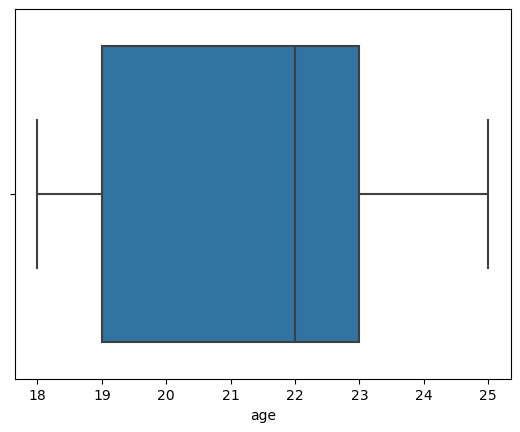

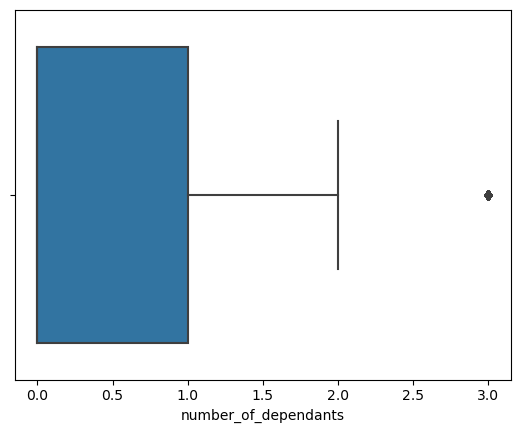

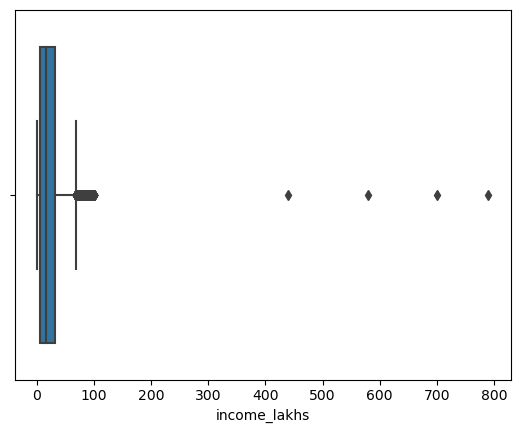

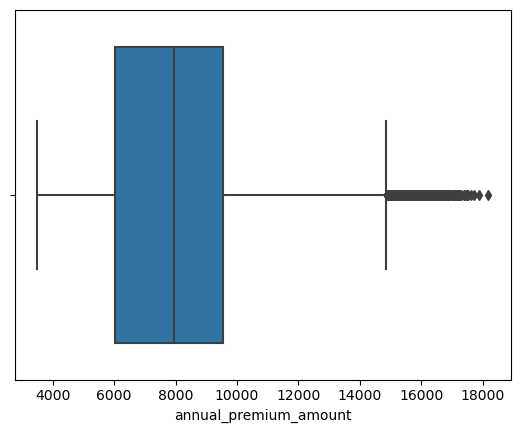

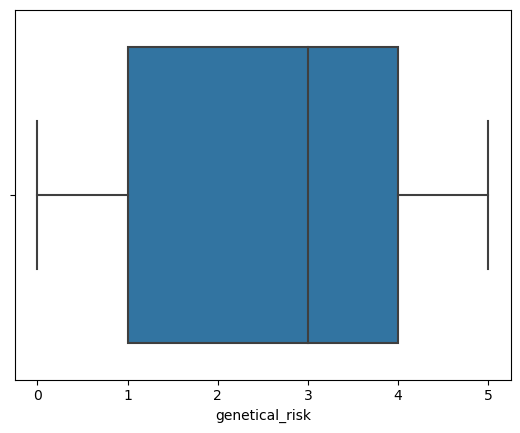

In [123]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [124]:
# here we can se that age and income_lakhs both have the outliers which need to be handled and 
#annual_premuim_amount has only two outliers which can be ignored

In [125]:
df[df.age>100]['age'].unique()

array([], dtype=int64)

In [126]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


<AxesSubplot:xlabel='income_lakhs', ylabel='Count'>

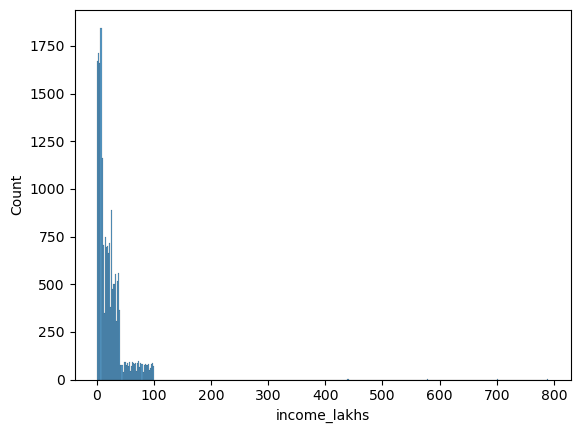

In [127]:
sns.histplot(df.income_lakhs)

In [128]:
#we use IQR methodlogy to handle the income_lakhs featture

In [129]:
def iqr(data):
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return lower_bound,upper_bound

In [130]:
quantile_threshold = df1.income_lakhs.quantile(0.999)
quantile_threshold

100.0

In [131]:
df2 = df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


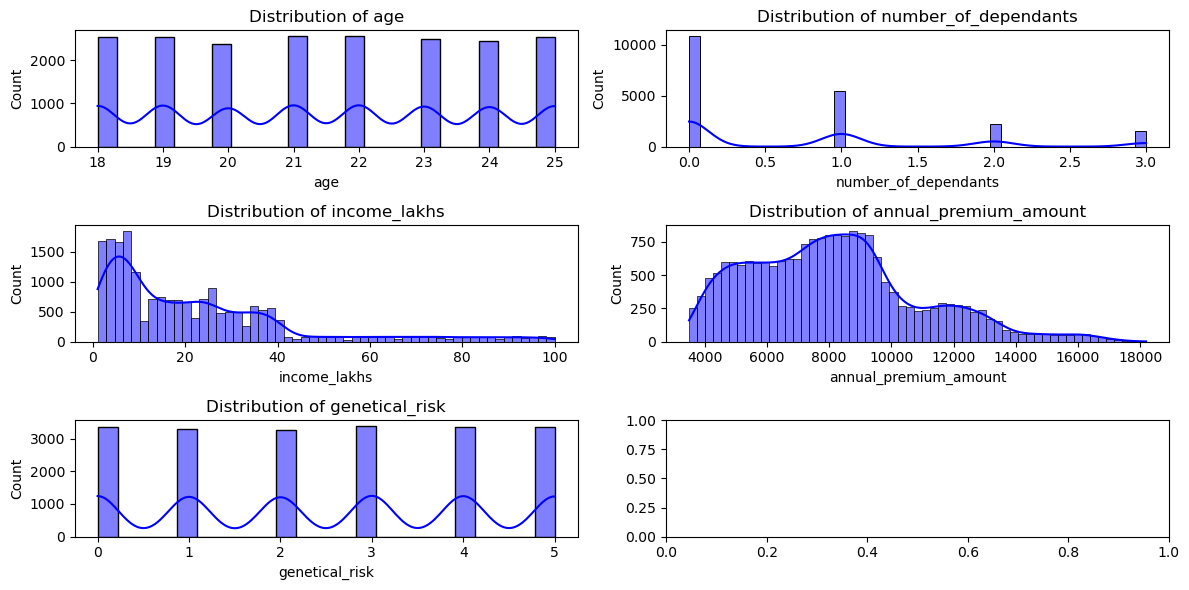

In [132]:
rows, cols = 3, 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))  

for i in range(0, len(numeric_columns), 2):
    row_index = i // cols

    for col_index in range(cols):
        if i + col_index < len(numeric_columns):
            col = numeric_columns[i + col_index]
            sns.histplot(df2[col], kde=True, color='blue', ax=axes[row_index, col_index])
            axes[row_index, col_index].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

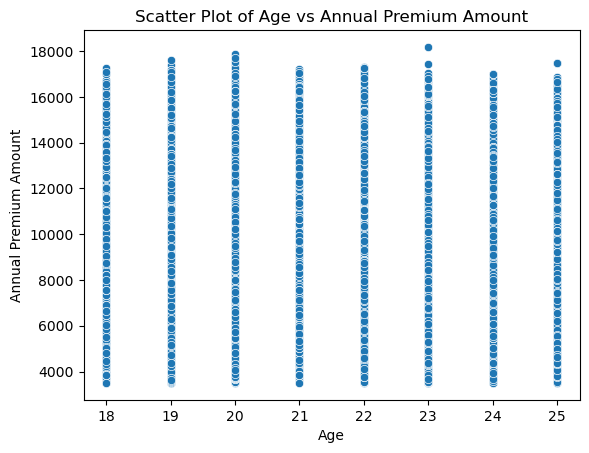

In [133]:
sns.scatterplot(x='age', y='annual_premium_amount', data=df2)
plt.title('Scatter Plot of Age vs Annual Premium Amount')
plt.xlabel('Age')
plt.ylabel('Annual Premium Amount')
plt.show()

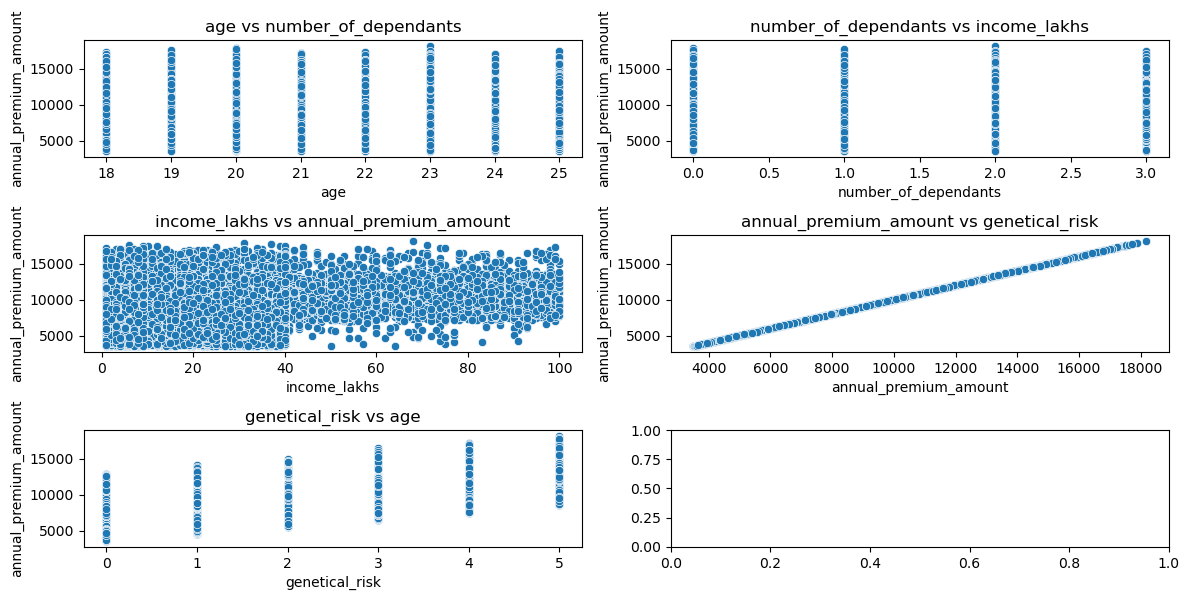

In [135]:
rows, cols = 3, 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))  

for i in range(0, len(numeric_columns), 2):
    row_index = i // cols


    for col_index in range(cols):
        if i + col_index < len(numeric_columns):
            col1 = numeric_columns[i + col_index]
            col2 = numeric_columns[(i + col_index + 1) % len(numeric_columns)]
            sns.scatterplot(x=df2[col1], y=df2['annual_premium_amount'], ax=axes[row_index, col_index])
            axes[row_index, col_index].set_title(f'{col1} vs {col2}')

plt.tight_layout()
plt.show()

### Categorical features

In [136]:
df2.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
genetical_risk            int64
dtype: object

In [137]:
categorical_cols = df2.select_dtypes('object')
categorical_cols.columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [138]:
for col in categorical_cols:
    print(col,df2[col].unique())

gender ['Male' 'Female']
region ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status ['Unmarried' 'Married']
bmi_category ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status ['Self-Employed' 'Freelancer' 'Salaried']
income_level ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan ['Silver' 'Bronze' 'Gold']


In [ ]:
#here as you can see in the smoking status people have given smoking = 0 and does not smoke and not smoking values
#which are similar as no smoking so it is better to replace it as not smoking itself

In [139]:
df2['smoking_status'].replace({
    'Smoking=0' : 'No Smoking',
    'Does Not Smoke' : 'No Smoking',
    'Not Smoking' : 'No Smoking'
},inplace=True)
df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [140]:
pct_gender=df2['gender'].value_counts(normalize=True)

<AxesSubplot:>

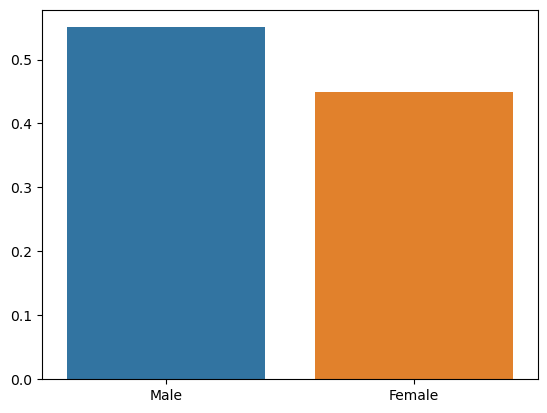

In [141]:
sns.barplot(x=pct_gender.index,y=pct_gender.values)

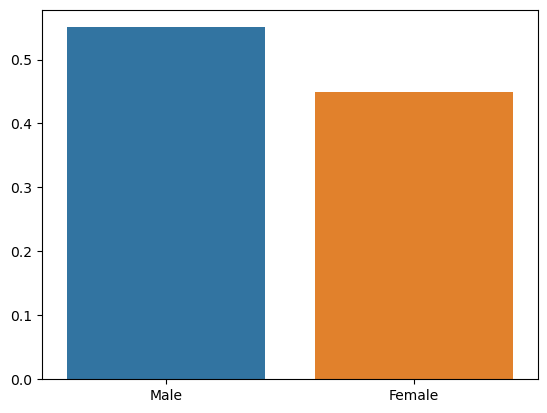

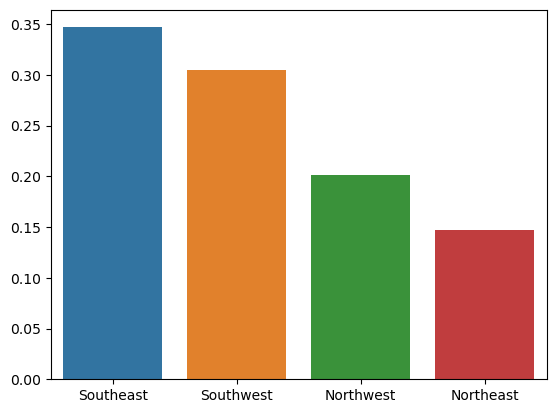

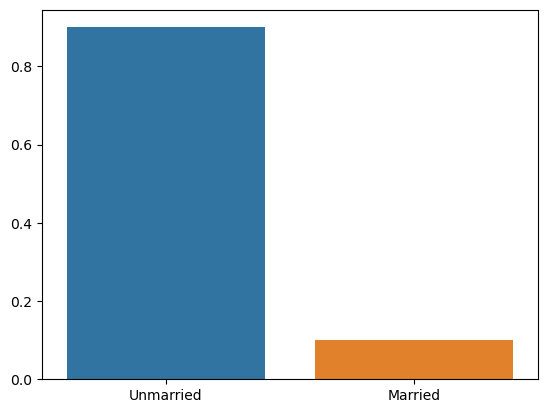

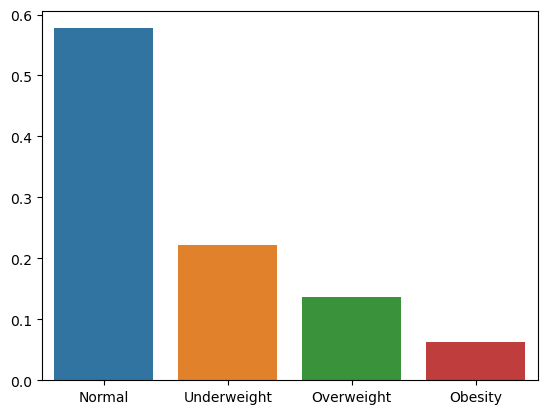

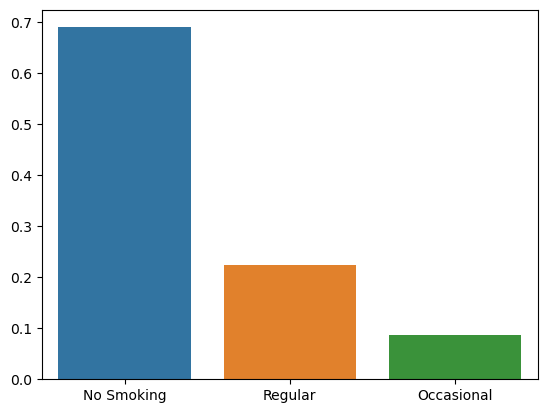

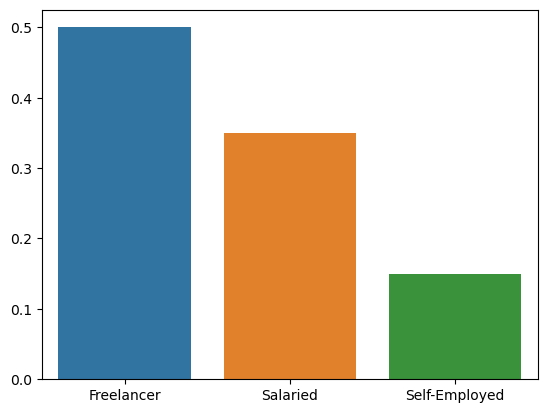

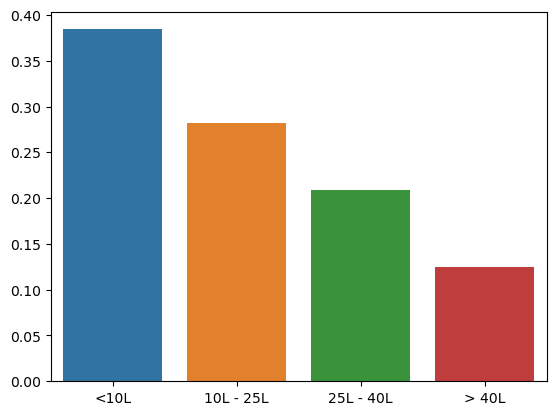

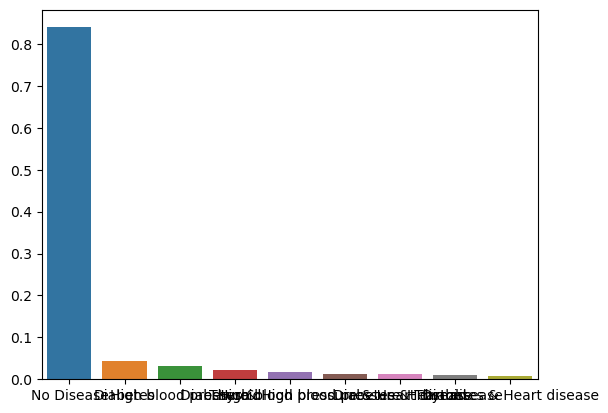

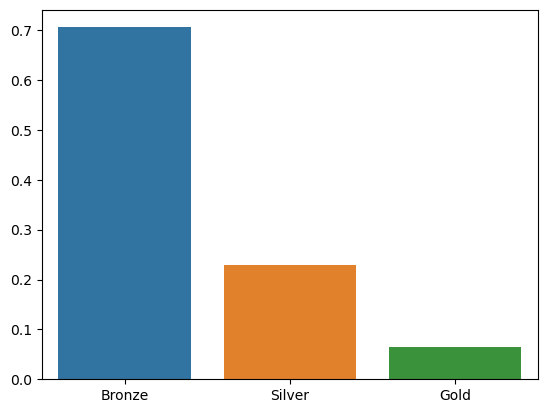

In [142]:
for col in categorical_cols:
    category_counts = df2[col].value_counts(normalize=True)
    sns.barplot(x=category_counts.index , y = category_counts.values)
    plt.show()

# Bi-variate analysis
### this means analyzing with two variables

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


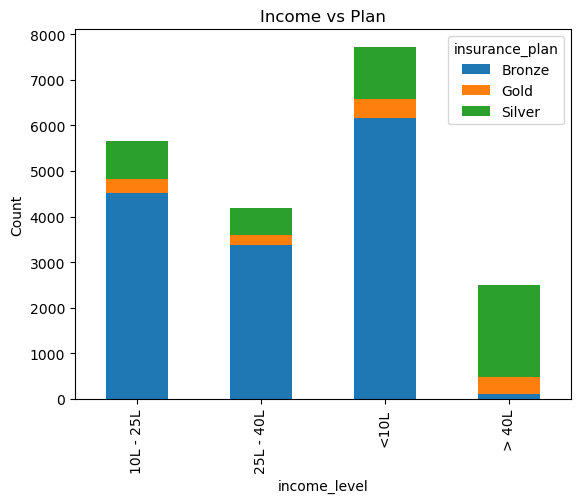

In [143]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

crosstab.plot(kind='bar',stacked = True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()


<AxesSubplot:xlabel='insurance_plan', ylabel='income_level'>

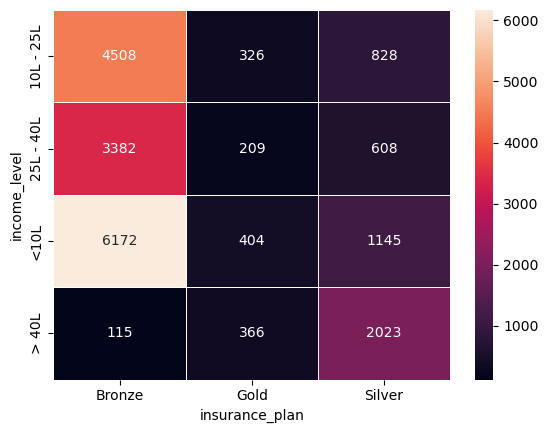

In [144]:
sns.heatmap(crosstab,annot=True,fmt='d',linewidths=.5)

## Feature Engineering

In [145]:
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4


In [146]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [ ]:
# here we are calculating the risk score for the medical history and usually provided by the buisness people
# with the risk score we will calculate the medical risk score because machinnes cannot process soo much text 
# which contains in the medical_history feature

In [147]:
risk_score = {
    'diabetes' : 6,
    'heart disease' : 8,
    'high blood pressure' : 6,
    'thyroid' : 5,
    'no disease' : 0,
    'none' : 0
 }



In [148]:
df2[['disease1','disease2']] = df['medical_history'].str.split(" & ",expand = True).apply(lambda x : x.str.lower())
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,None


In [149]:
df2['disease1'].fillna('none',inplace=True)
df2['disease2'].fillna('none',inplace=True)
df2['total_risk_score'] = 0

for val in ['disease1','disease2']:
    df2['total_risk_score'] += df2[val].map(risk_score)
    
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalised_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head()


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalised_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,none,0,0.000000


In [150]:
ordinal_mapping = {'Bronze': 1, 'Silver': 2, 'Gold': 3}

df2['insurance_plan'] = df2['insurance_plan'].map(ordinal_mapping)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalised_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,2,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,2,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,1,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,1,5712,1,no disease,none,0,0.000000


In [151]:
df2.insurance_plan.unique()

array([2, 1, 3])

In [152]:
df2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [153]:
ordinal_mapping2 = {'<10L': 1, '10L - 25L': 2, '25L - 40L': 3, '> 40L': 4}

df2['income_level'] = df2['income_level'].map(ordinal_mapping2)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalised_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,2,15,No Disease,1,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,2,14,No Disease,1,5712,1,no disease,none,0,0.000000


In [156]:
nominal_cols = ['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2,columns=nominal_cols,drop_first=True,dtype=int)

In [157]:
df3.shape

(20086, 24)

In [158]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


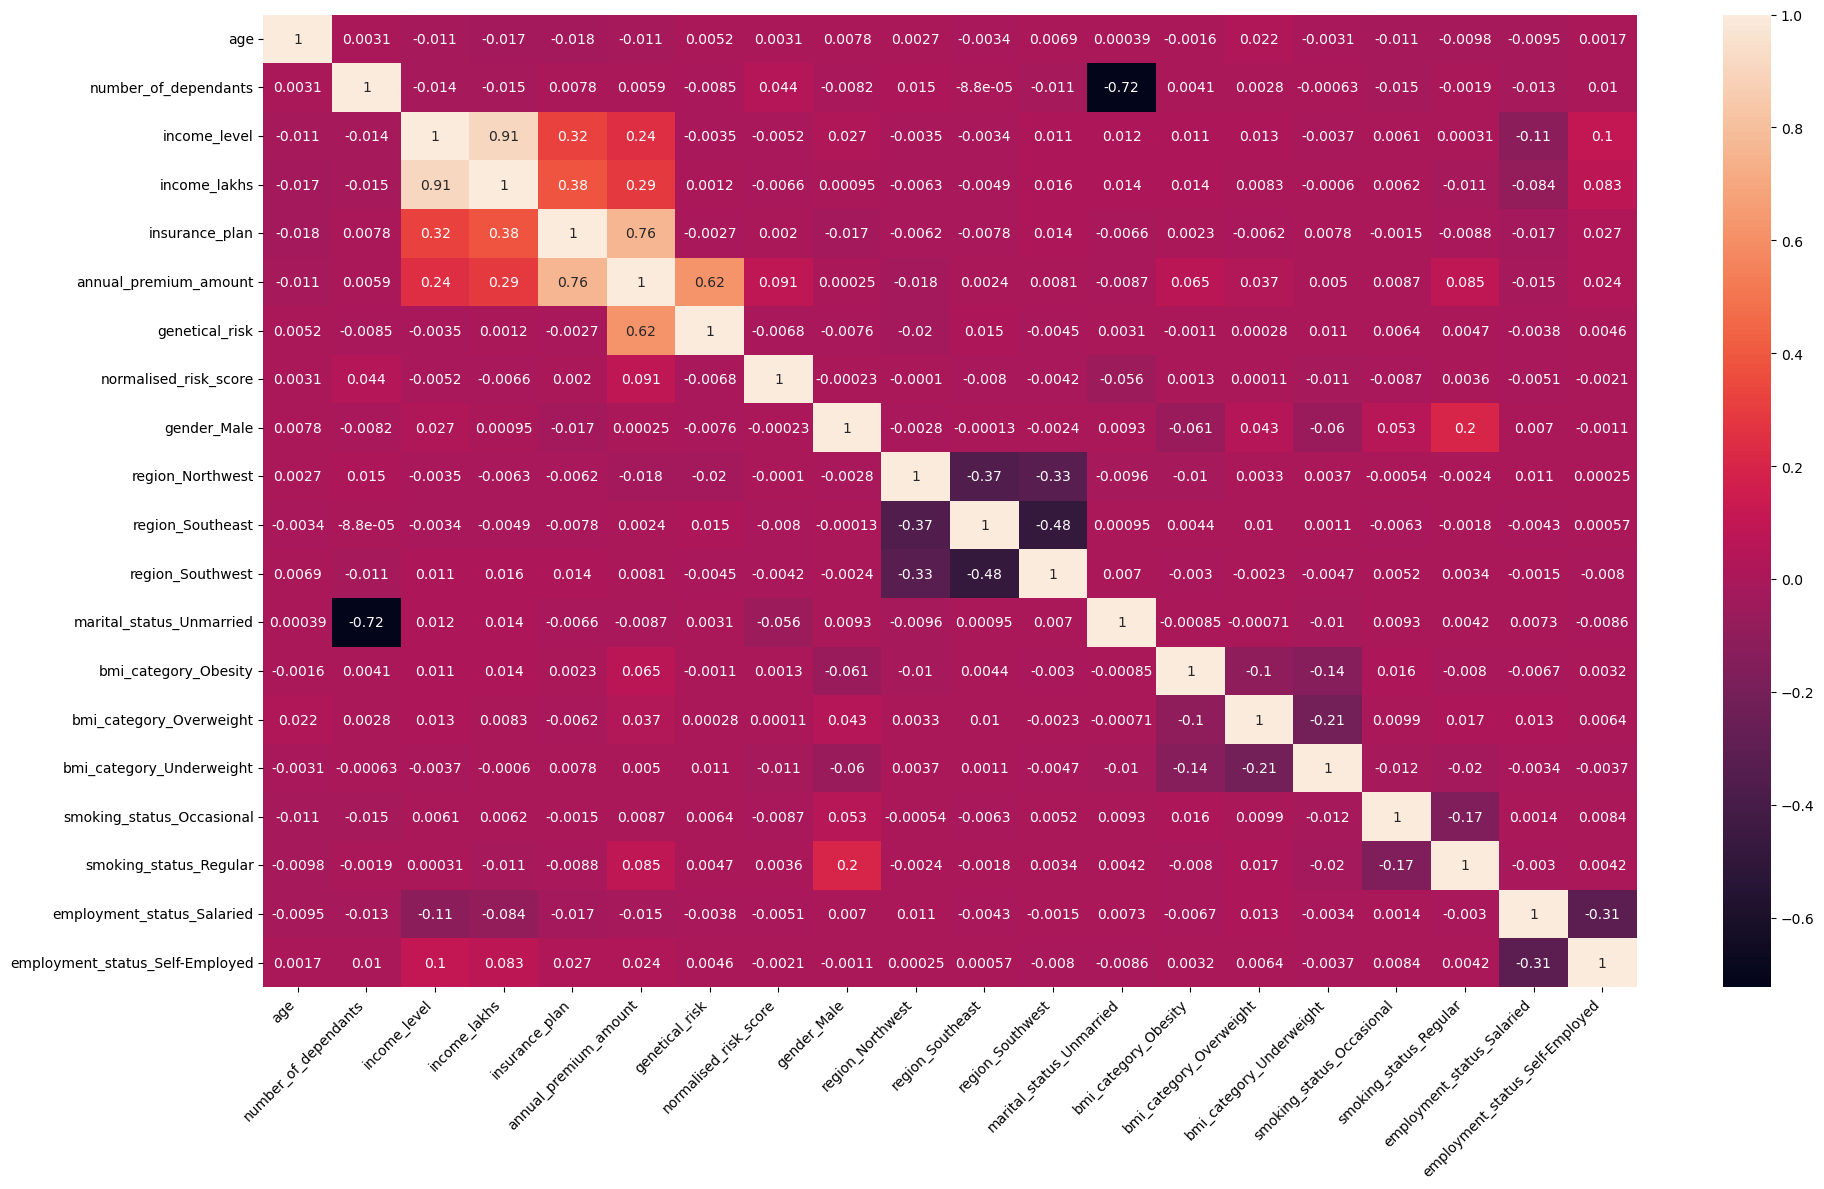

In [159]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [160]:
X = df4.drop('annual_premium_amount',axis = 'columns')
y = df4['annual_premium_amount']

cols_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
scaler = MinMaxScaler()

X[cols_scale] = scaler.fit_transform(X[cols_scale])
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,1.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,1.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.333333,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.333333,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [161]:
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [162]:
calculate_vif(X)

,column,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalised_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [ ]:
# as you can see vif is greater than 10 for two columns for the next iteration drop any one and calculate vif again

In [163]:
calculate_vif(X.drop('income_level',axis =1))

,column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalised_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [164]:
X_reduced = X.drop('income_level',axis = 1)
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


# Model Training

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [166]:
# Linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
model_lr.score(X_test,y_test)

0.9887228766877642

In [167]:
model_lr.coef_

array([-7.20472496e+00,  1.95039013e+01, -1.08587942e+01,  1.44751686e+01,
        7.00081405e+03,  4.99692885e+03,  1.10918781e+03,  8.37409720e+00,
        1.64709311e+00, -3.30565221e+00,  6.27048508e+00,  1.60123167e+01,
        8.12850817e+02,  4.00452976e+02,  1.07538600e+02,  2.05081700e+02,
        6.11024898e+02, -1.58123716e-01, -4.99735217e+00])

In [168]:
model_lr.intercept_

3979.3837638907708

In [169]:
feature_importance = model_lr.coef_
coef_df = pd.DataFrame(feature_importance,index = X_test.columns,columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)
coef_df

,Coefficients
income_level,-10.858794
age,-7.204725
employment_status_Self-Employed,-4.997352
region_Southeast,-3.305652
employment_status_Salaried,-0.158124
region_Northwest,1.647093
region_Southwest,6.270485
gender_Male,8.374097
income_lakhs,14.475169
marital_status_Unmarried,16.012317


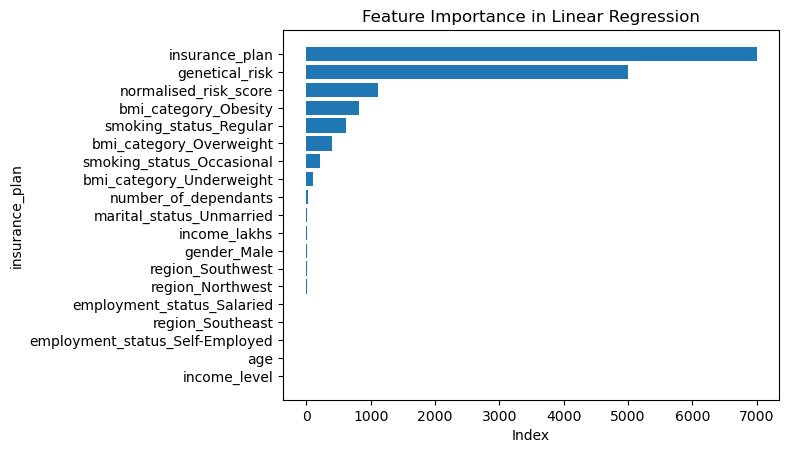

In [170]:
plt.barh(coef_df.index, coef_df['Coefficients'])
plt.title('Feature Importance in Linear Regression')
plt.xlabel('Index')
plt.ylabel(col)
plt.show()

In [171]:
#Ridge Model 
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train,y_train)
ridge_model.score(X_test,y_test)


0.9887239530491364

In [172]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_model.score(X_test,y_test)


0.9868118477034001

In [173]:
#XG BOOST regression model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train,y_train)
xgb_model.score(X_test,y_test)

0.9887126605507682

# Fine Tuning

In [174]:
#In order to find the best hyperparameters we will use randomisedCV
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators' : [20,40,60,80],
    'learning_rate' : [0.01,0.5,0.75,0.1],
    'max_depth' : [3,4,5,6]
}
random_search = RandomizedSearchCV(estimator=model_xgb,param_distributions=param_grid,n_iter=10,cv=5,random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Best Parameters: {'n_estimators': 60, 'max_depth': 5, 'learning_rate': 0.1}
Mean Squared Error: 84917.27729132763
R-squared: 0.9888335053270472


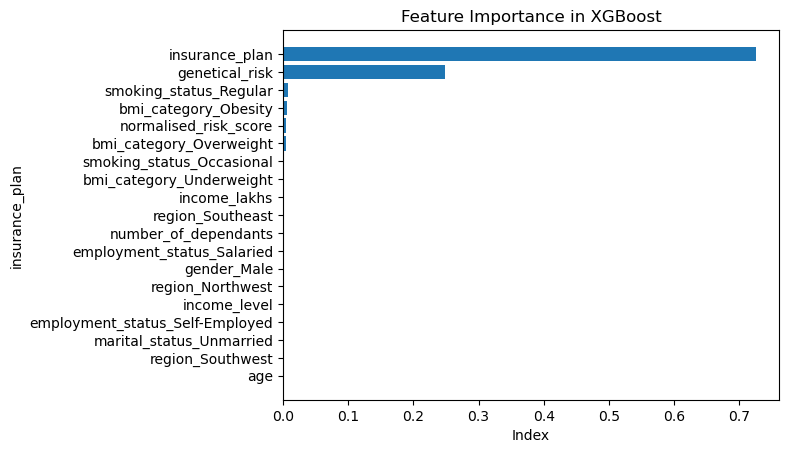

In [175]:
# Plotting a feature importances bar chart for xgboost model
feature_importance = best_rf_model.feature_importances_
coef_df = pd.DataFrame(feature_importance,index = X_test.columns,columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.barh(coef_df.index, coef_df['Coefficients'])
plt.title('Feature Importance in XGBoost')
plt.xlabel('Index')
plt.ylabel(col)
plt.show()

# Error Analysis

In [176]:
y_pred = best_rf_model.predict(X_test)

residuals = y_pred-y_test
residuals_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual' : y_test,
    'predicted' : y_pred,
    'diff' : residuals,
    'diff_pct' : residuals_pct
})

results_df

,actual,predicted,diff,diff_pct
12774,6238,6101.511719,-136.488281,-2.188013
14758,9462,9601.301758,139.301758,1.472223
13205,5152,5613.116699,461.116699,8.950246
14278,6988,7406.135254,418.135254,5.983618
19351,4917,5099.075684,182.075684,3.702983
...,...,...,...,...
17652,7635,8034.428223,399.428223,5.231542
5807,4845,4628.644043,-216.355957,-4.465551
10298,13866,13326.051758,-539.948242,-3.894045
13316,5255,5099.075684,-155.924316,-2.967161


<AxesSubplot:xlabel='diff_pct', ylabel='Count'>

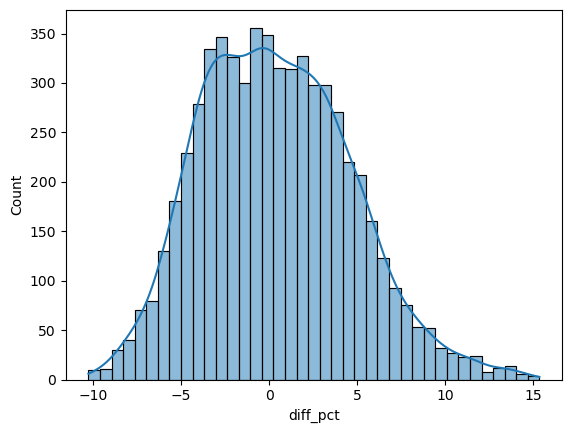

In [177]:
sns.histplot(results_df['diff_pct'],kde = True)

In [178]:
extreme_error_threshold = 10
extreme_results_df = results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]
extreme_results_df.shape

(127, 4)

In [179]:
results_df.shape

(6026, 4)

In [180]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

2.107534019249917

In [181]:
results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct',ascending=False)

,actual,predicted,diff,diff_pct


In [182]:
X_test.index

Int64Index([12774, 14758, 13205, 14278, 19351, 10622, 16391, 14799, 17184,
            16348,
            ...
             8695,  9658, 14195,  1365,   399, 17652,  5807, 10298, 13316,
             2583],
           dtype='int64', length=6026)

In [183]:
extreme_results_df.index

Int64Index([12669,  2918, 17084,  7181, 12285, 13476, 15481,  2948,  4919,
            15170,
            ...
            13574, 15166,  4204,  8692,  1986, 16062, 17811,  8008,  9714,
             1534],
           dtype='int64', length=127)

In [184]:
extreme_error_df = X_test.loc[extreme_results_df.index]
extreme_error_df.head(10)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12669,0.857143,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0,1,0,1,0,1,0,0,0,1,0
2918,0.285714,0.000000,0.333333,0.151515,0.0,0.2,0.0,1,1,0,0,1,0,0,0,0,0,1,0
17084,1.000000,0.000000,0.666667,0.353535,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0
7181,0.571429,0.000000,0.333333,0.161616,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0
12285,0.428571,0.333333,0.333333,0.232323,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0
13476,0.714286,0.333333,0.000000,0.030303,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0
15481,0.428571,0.000000,0.000000,0.070707,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,1,0
2948,0.714286,0.000000,0.666667,0.282828,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0
4919,0.571429,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0,1,0,1,0,0,0,1,0,0,0
15170,0.142857,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,1,0,0


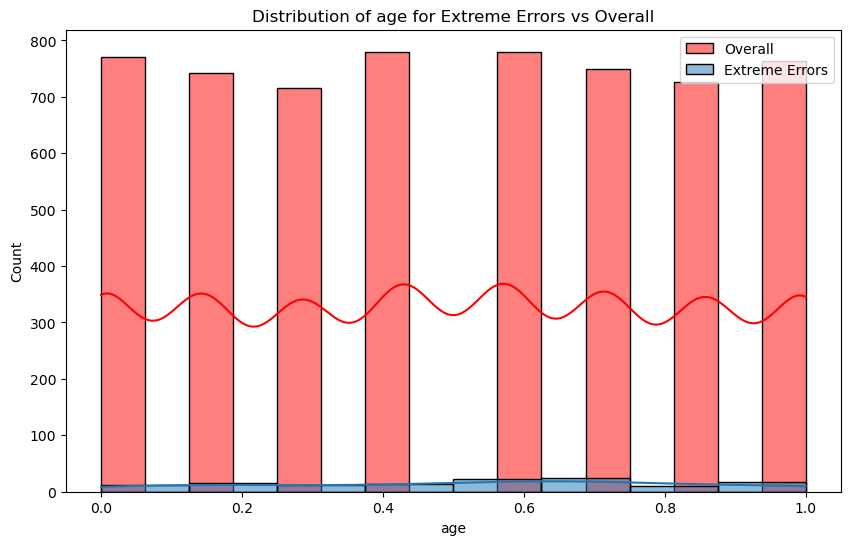

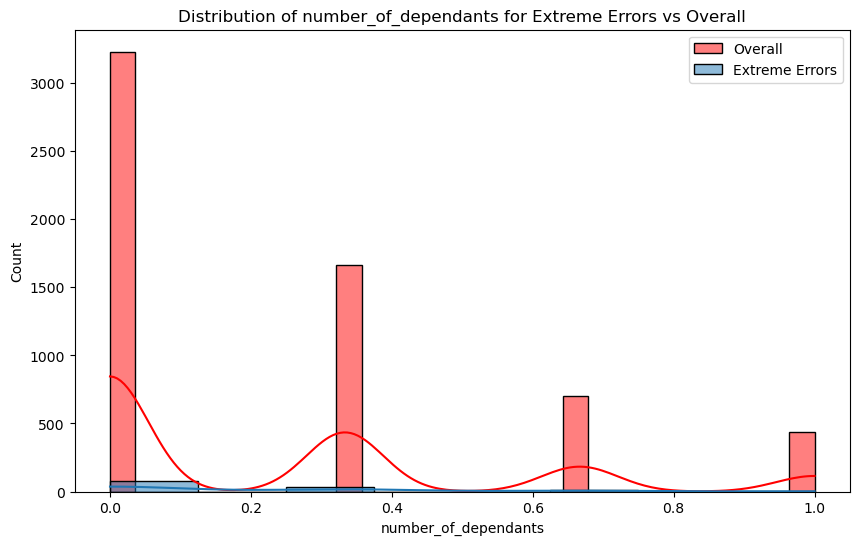

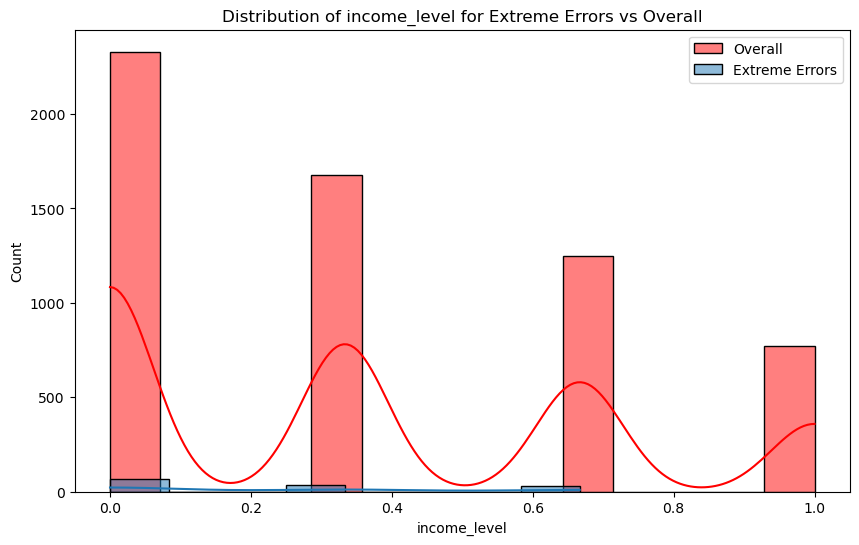

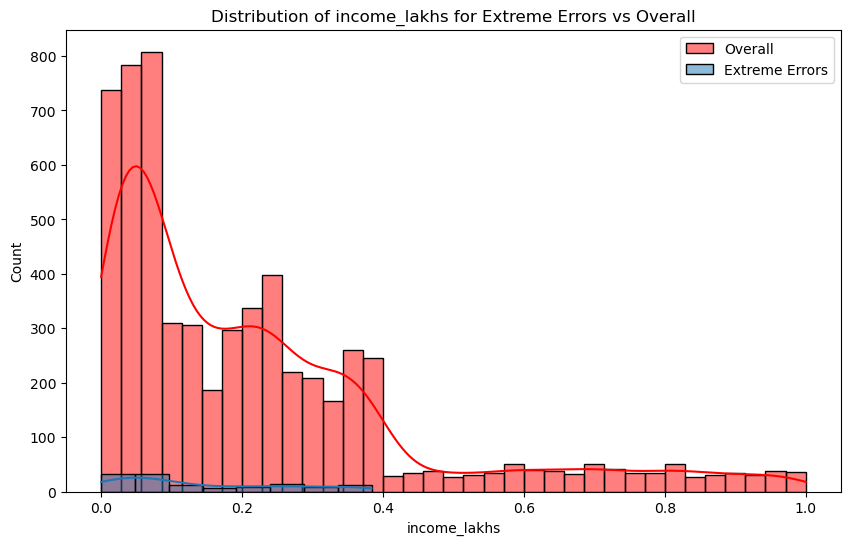

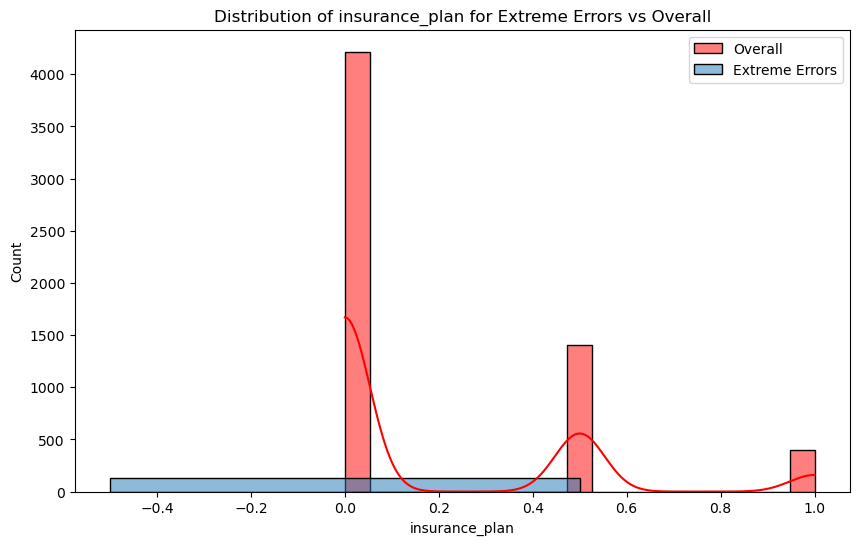

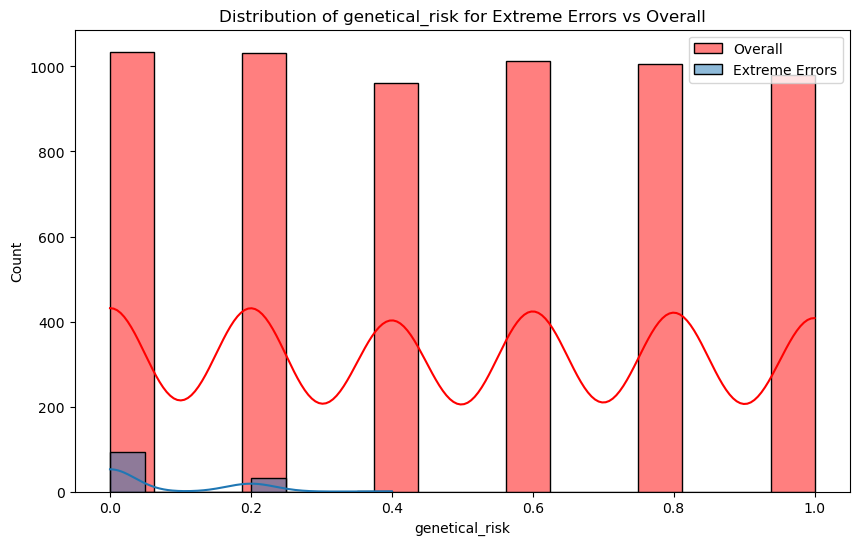

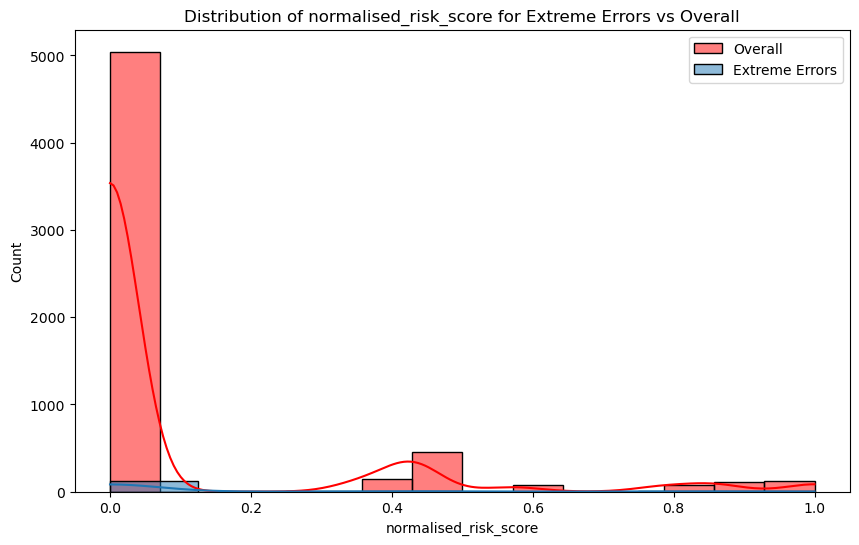

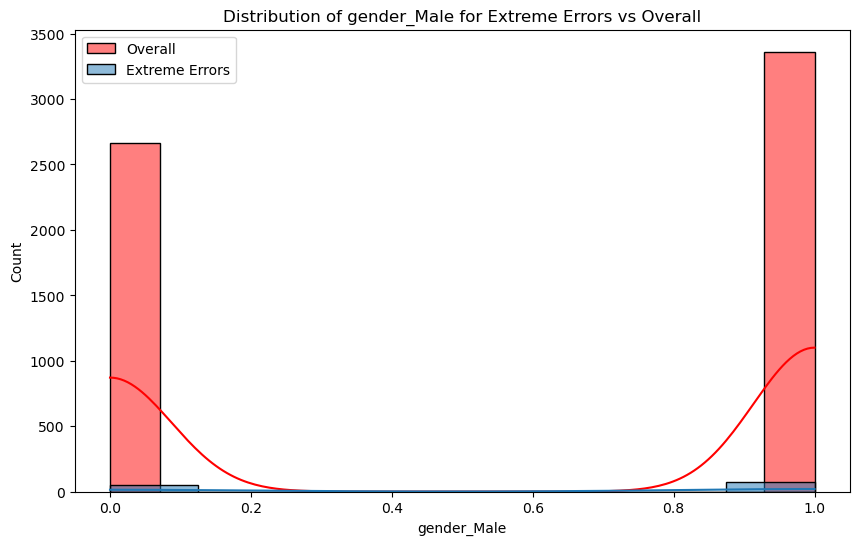

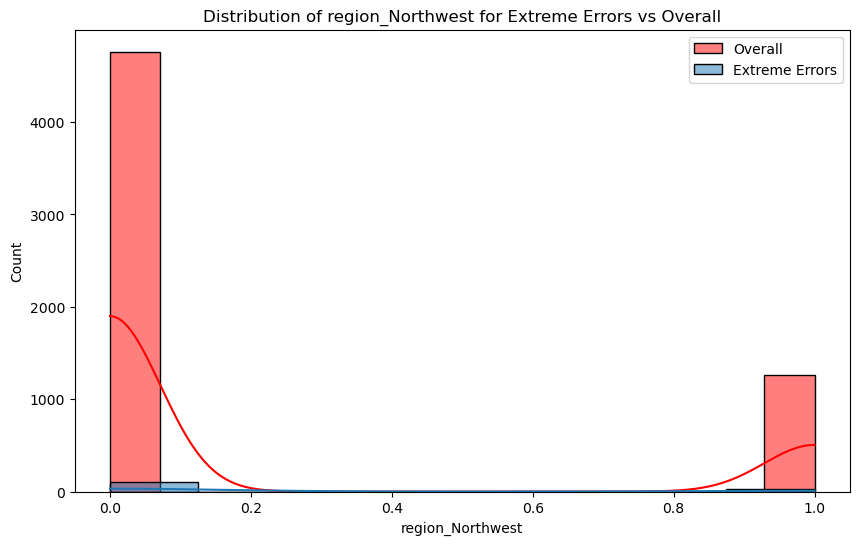

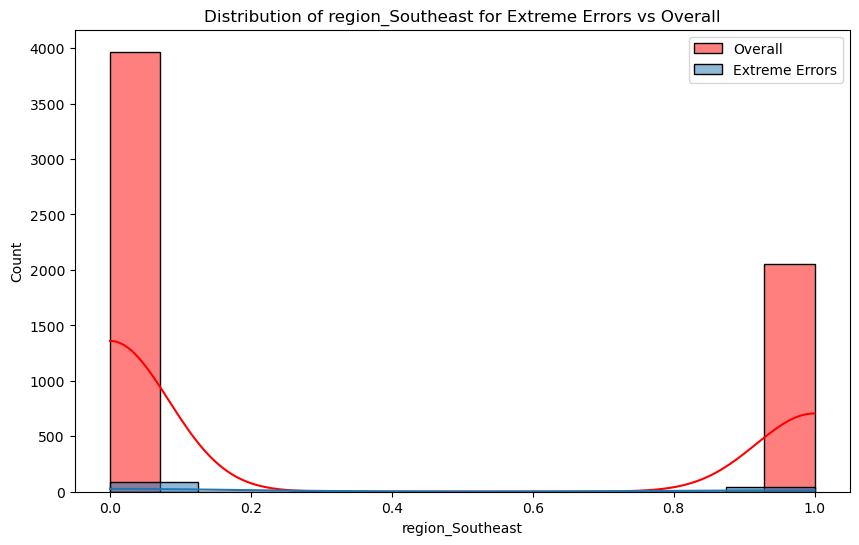

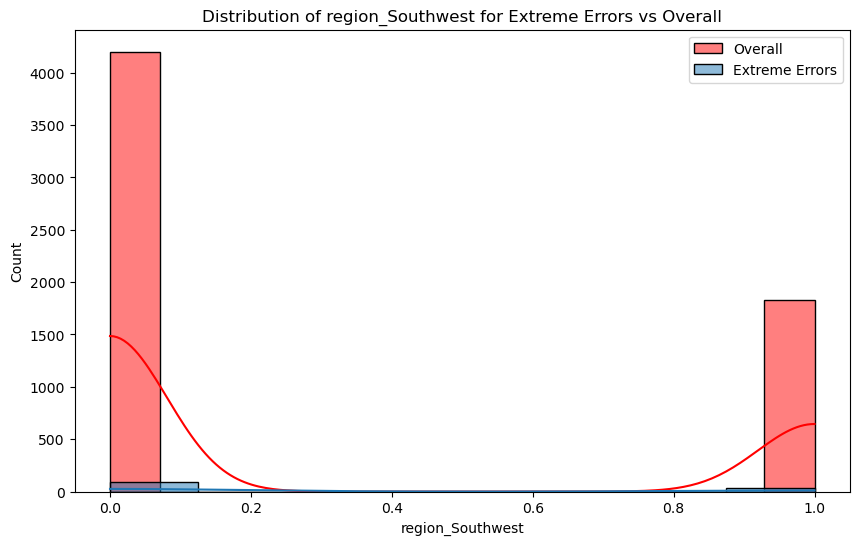

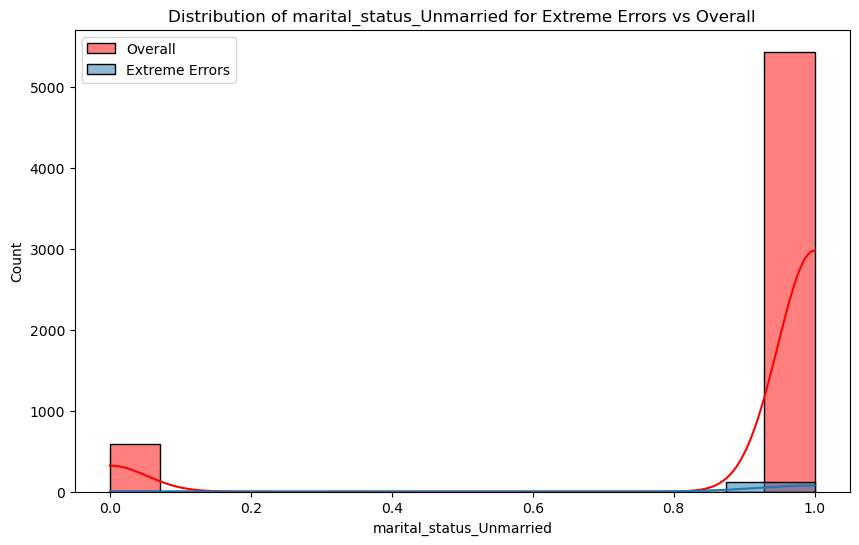

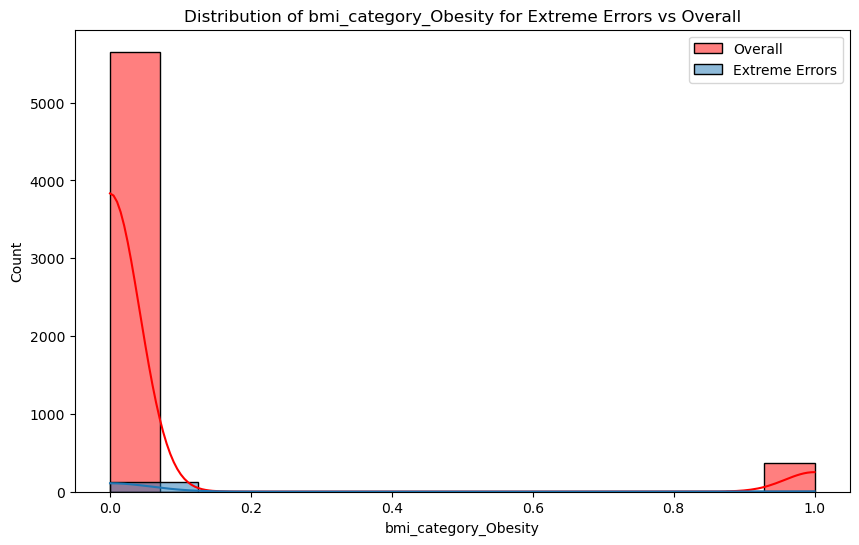

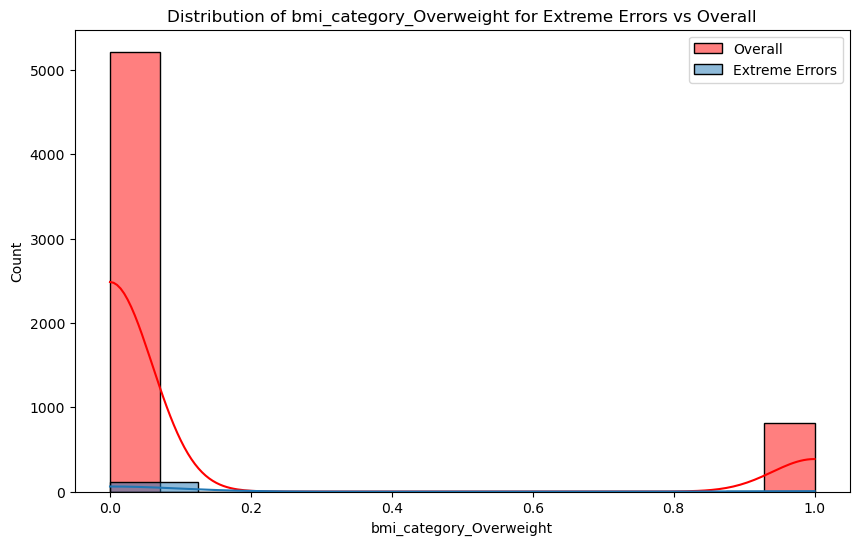

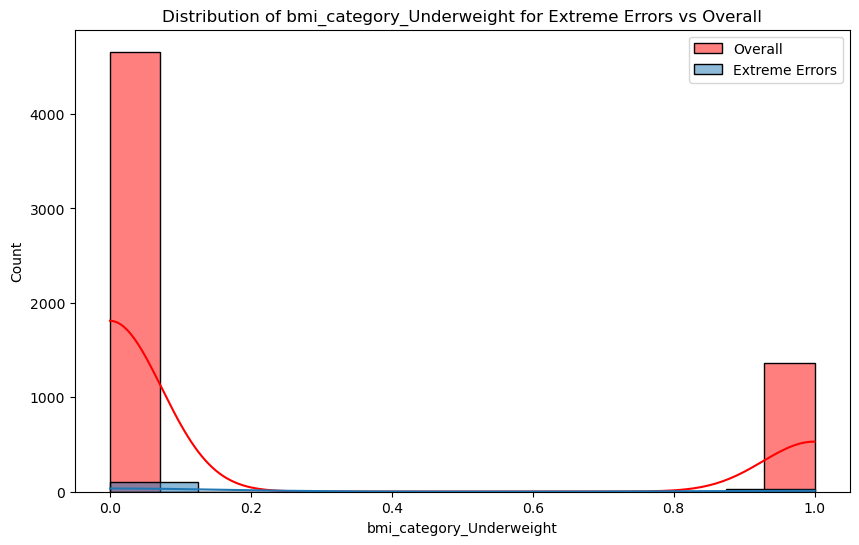

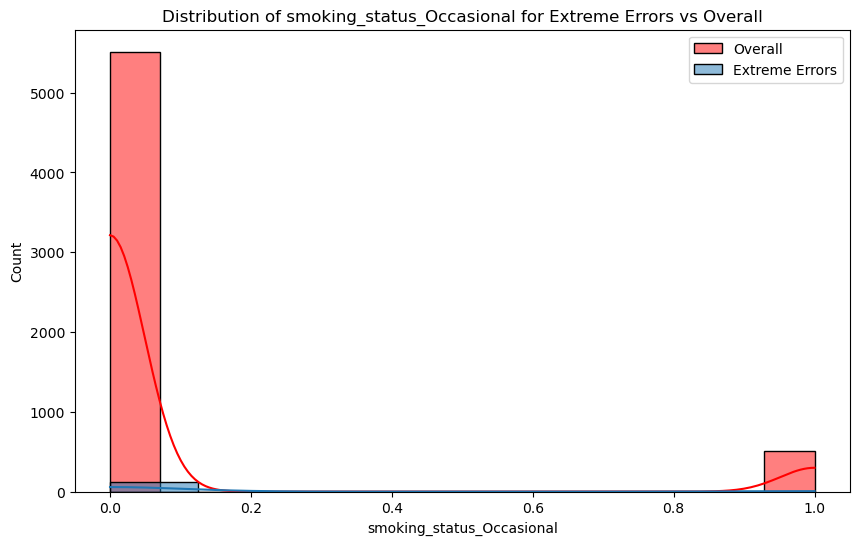

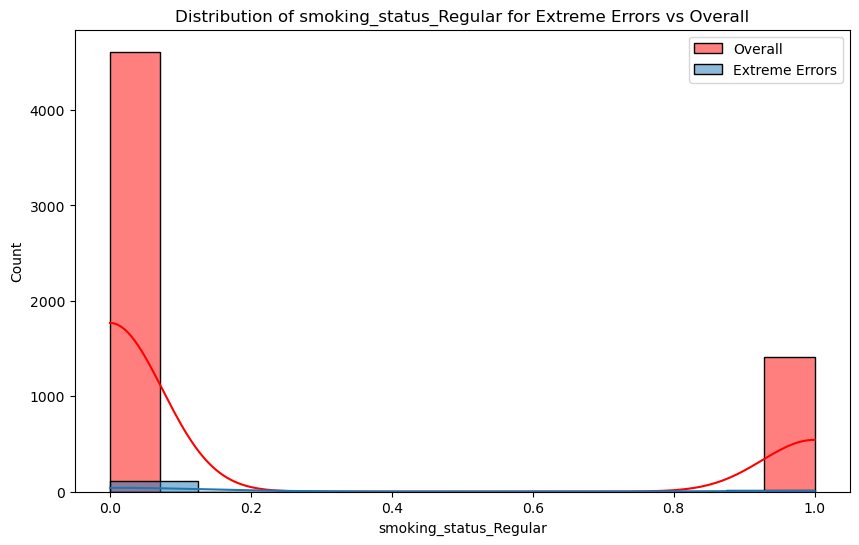

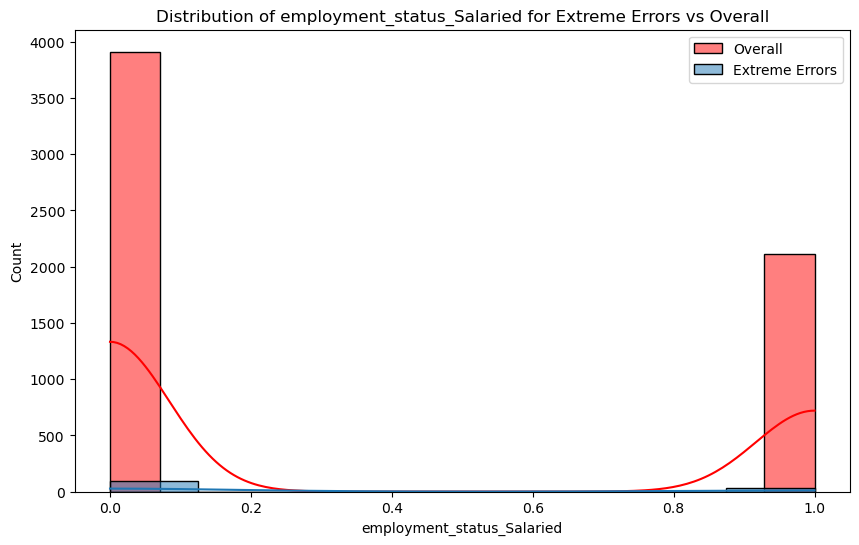

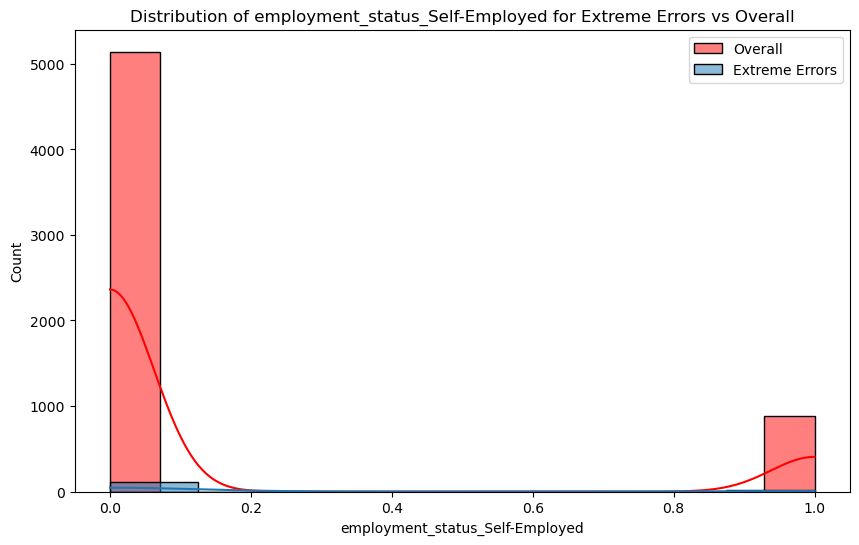

In [185]:
for feature in X.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(X_test[feature],color = 'red',label='Overall',kde=True)
    sns.histplot(extreme_error_df[feature],label='Extreme Errors',kde=True)
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.legend()
    plt.show()

In [186]:
cols_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan',
 'genetical_risk']

In [187]:
df_reversed = pd.DataFrame()
df_reversed[cols_scale] = scaler.inverse_transform(extreme_error_df[cols_scale])

In [188]:
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
0,24.0,0.0,1.0,1.0,1.0,0.0
1,20.0,0.0,2.0,16.0,1.0,1.0
2,25.0,0.0,3.0,36.0,1.0,0.0
3,22.0,0.0,2.0,17.0,1.0,0.0
4,21.0,1.0,2.0,24.0,1.0,0.0


<AxesSubplot:xlabel='age', ylabel='Count'>

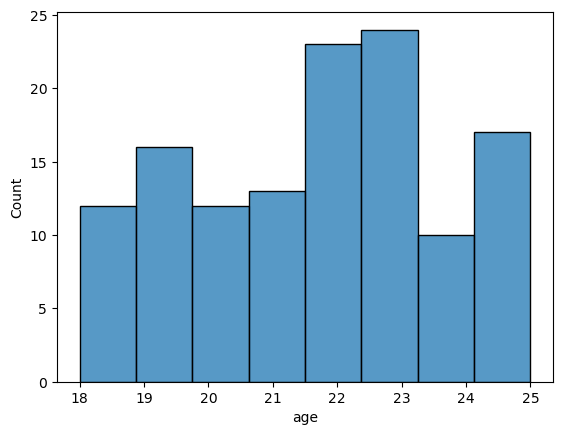

In [189]:
sns.histplot(df_reversed['age'])

In [190]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
count,127.000000,127.000000,127.000000,127.000000,127.0,127.000000
mean,21.700787,0.582677,1.700787,14.732283,1.0,0.275591
std,2.186956,0.811044,0.809810,11.826422,0.0,0.465938
min,18.000000,0.000000,1.000000,1.000000,1.0,0.000000
25%,20.000000,0.000000,1.000000,5.000000,1.0,0.000000
50%,22.000000,0.000000,1.000000,9.000000,1.0,0.000000
75%,23.000000,1.000000,2.000000,25.000000,1.0,1.000000
max,25.000000,3.000000,3.000000,39.000000,1.0,2.000000


In [191]:
#this shoes that 99% in the extreme error margin contains age grp which is less than age 25
df_reversed['age'].quantile(0.99)

25.0

# Export the Model

In [ ]:
## with the help of joblib module we will export the model into a directory called artifact

In [196]:
from joblib import dump

dump(best_rf_model,"artifacts/model_young.joblib")

['artifacts/model_young.joblib']

In [195]:
scaler_with_cols = {
    'scaler' : scaler,
    'cols_to_scale' : cols_scale
}
dump(scaler_with_cols,"artifacts/scaler_young.joblib")

['artifacts/scaler_young.joblib']